Introduction to Artificial Intelligence - Supervised Learning lab Session Part 1
--
At the end of this session, you will be able to : 
- Perform basic supervised learning tasks using sklearn.
- Generate PyRat Datasets for a supervised learning setting.
- Apply supervised learning on PyRat datasets, in two cases (winner prediction, best movement prediction).

In [2]:
# The tqdm package is useful to visualize progress with long computations. 
# Install it using pip. 
import tqdm
import numpy as np
import ast
import os

Basics of machine learning using sklearn
--

sklearn is a very powerful package that implements most machine learning methods. sklearn also includes cross-validation procedures in order to prevent overfitting, many useful metrics and data manipulation techniques that enables very careful experimentations with machine learning. It is also very straightforward to use. We will introduce a few basic concepts of sklearn. 

First, it is very easy to simulate data with sklearn. 

In [16]:
from sklearn.datasets import make_blobs

Use the function make_blobs to generate clouds of points with $d=2$, and visualize them using the function scatter from matplotlib.pyplot. You can generate as many samples as you want.You can generate several clouds of points using the argument centers. We recommend using random_state=0 so that your results are from the same distribution as our tests.

Vocabulary : n_samples is the number of generated samples, n_features is $d$ (number of dimensions), centers is the number of classes. 

Hint : you can use the output "y" as an argument for the color argument ("c") of the scatter function.

In [75]:
### CELL TO BE COMPLETED - Generate blobs.

x_blobs,y_blobs = make_blobs(n_samples=3000,n_features=2,centers=8,random_state=0)


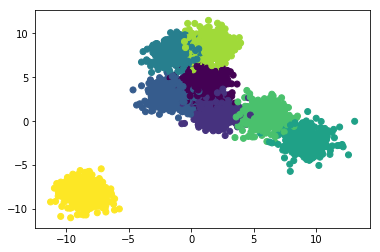

In [76]:
### CELL TO BE COMPLETED - Plot.
### Don't forget to import pyplot and use %matplotlib inline.
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.scatter(x_blobs[:,0],x_blobs[:,1],c=y_blobs) 

You can use other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment on higher dimension, although it becomes difficult to visualize. 

sklearn has many other data generators, as well as ways to load standard datasets of various sizes. Check them out here: 

http://scikit-learn.org/stable/datasets/index.html


Now that we have generated a simple dataset, let's try to do a basic supervised learning approach. 

First, in order to mesure the ability of the model to generalize, we have to split the dataset into a training set and a test set. The test set is the part of the dataset that the model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

In sklearn, you can use the train_test_split function to split datasets.

Try to split the dataset you previously generated (the blobs) into x_train, x_test, y_train, y_test, with 80% in x_train and 20% in x_test. Set random_state = 0 so that the function always returns the same split.

In [77]:
#### CELL TO BE COMPLETED 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_blobs,y_blobs,test_size=0.2,random_state=0)

Check the shapes of the generated vectors.

In [78]:
x_train.shape, x_test.shape, x_blobs.shape

((2400, 2), (600, 2), (3000, 2))

Let's use a K-Nearest Neighbor classifier to test whether we can classify this dataset. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 

In K-Nearest Neighbor classification (also known as KNN), when you want to predict the class of an object, you look at the K (an hyperparameter) nearest examples from the training (using a distance metric, in our case the euclidean distance). This object is then classified by a majority vote among its neighbors. In other words, the class of the object is the most common class among its neighbours.

To use a Nearest Neighbor with sklearn, you have to use the class [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn API is consistent. This means that for almost every method they propose you can train it using [object.fit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit), you can use it to make prediction with [object.predict](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score).

In [79]:
### CELL TO BE COMPLETED - Train the classifier and get the accuracy in both sets.
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=1)
classifier.fit(x_train,y_train)
#print(classifier.predict(x_test))
print("Accuracy of train set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy of test set {}%".format(classifier.score(x_test,y_test)*100))

Accuracy of train set 100.0%
Accuracy of test set 89.83333333333333%


Your classifier should have a train accuracy of 1, while the test accuracy should be high but not perfect.

This is caused by the bias-variance trade-off. The 1-NN classifier always has a bias of 0 (it perfectly classifies the training set) but it has a high variance given that having one more example in the training set can completely change a decision.

Try to avoid having such a high variance, test different values of k and plot the accuracies given the different values of the hyperparameter k. 

If you have time, we advise you to do the same analysis but varying the train/test split size.

100%|██████████| 24/24 [00:02<00:00,  8.18it/s]


Best k: 11
Best accuracy for test set {}% 92.33333333333333


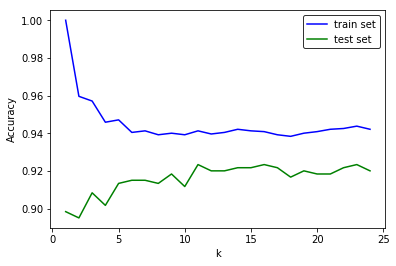

In [94]:
# CELL TO BE COMPLETED - Train networks with varying k.
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = range(1,25)  # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = KNeighborsClassifier(n_neighbors=k)
    classifier_new.fit(x_train,y_train)
    train_acc.append(classifier_new.score(x_train,y_train))
    test_acc.append(classifier_new.score(x_test,y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best k: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%",max(test_acc)*100)

Once your classifier is trained, and bias-variance analysed, it is time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

Print a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both training and test sets.

In the classification report, you are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

* Precision: What is the percentage of cases your model correctly classified while predicting a given class?
* Recall: What is the percentage of cases your model correctly classified while predicting examples belonging to a given class?
* F1 Score: Harmonic mean from precision and recall.

Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       298
           2       1.00      1.00      1.00       303
           3       1.00      1.00      1.00       296
           4       1.00      1.00      1.00       308
           5       1.00      1.00      1.00       301
           6       1.00      1.00      1.00       287
           7       1.00      1.00      1.00       305

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

[[302   0   0   0   0   0   0   0]
 [  0 298   0   0   0   0   0   0]
 [  0   0 303   0   0   0   0   0]
 [  0   0   0 296   0   0   0   0]
 [  0   0   0   0 308   0   0   0]
 [  0   0   0   0   0 301   0   0]
 [  0   0   0   0   0   0 287   0]
 [  0   0   0   0   0   0   0 305]]


Text(0, 0.5, 'Predicted class')

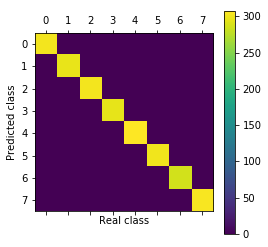

In [95]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
print("Training Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Test Set:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        73
           1       0.84      0.91      0.88        77
           2       0.90      0.83      0.86        72
           3       0.89      0.82      0.86        79
           4       0.99      1.00      0.99        67
           5       0.96      0.92      0.94        74
           6       0.89      0.90      0.89        88
           7       1.00      1.00      1.00        70

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600

[[60  7  5  1  0  0  0  0]
 [ 2 70  2  0  0  3  0  0]
 [10  1 60  1  0  0  0  0]
 [ 4  0  0 65  0  0 10  0]
 [ 0  0  0  0 67  0  0  0]
 [ 0  5  0  0  1 68  0  0]
 [ 3  0  0  6  0  0 79  0]
 [ 0  0  0  0  0  0  0 70]]


Text(0, 0.5, 'Predicted class')

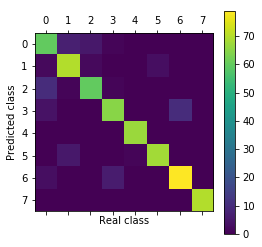

In [96]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
print("Test Set:")
print(report)
print(matrix)
plt.matshow(matrix)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Finally, you are going to plot the decision boundaries of our model. Use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will test our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y, each varying by $h$ and plot it nicely. [Link to the original implementation.](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

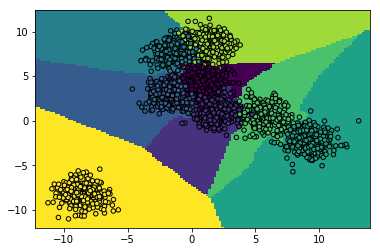

In [97]:
from matplotlib.colors import ListedColormap

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Generating PyRat datasets
--
First, you need the latest version of PyRat. To obtain it, clone the [official PyRat repository](https://github.com/vgripon/pyrat). 

Syntax is "git clone repo destinationdir".

In [102]:
### TO DO: open a terminal tab / window and clone the repo.

You can now launch Pyrat Games. 

In the context of the AI course, we are going to simplify the rules of PyRat a bit.
In fact, we are going to remove all walls and mud penalties. Also, we are not going to consider symmetric mazes anymore.

As such, a default game is launched with the following parameters:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric</pre>

In the supervised and unsupervised projects, we are going to look at plays between two greedy algorithms. Generating 1000 such games while saving data is easily obtained with PyRat:
<pre>python3 pyrat.py -p 40 -md 0 -d 0 --nonsymmetric --rat AIs/manh.py --python AIs/manh.py --tests 1000 --nodrawing --synchronous --save</pre>

We recommend that you open another terminal to launch this command. Generating 1000 games will take a few minutes, and you won't be able to evaluate any other cell from the jupyter notebook. 

It is possible to open a terminal window from the "Home" Interface of Jupyter Notebook.

PS: If you don't have pygame installed in your machine, open a terminal and run:

<pre>pip install pygame</pre>

The 1000 generated games will be in the "saves" folder.

In [103]:
### TO DO: open a terminal tab / window and launch the command to generate the games.

To convert the games into numpy arrays, we use a few functions that we define here. Feel free to modify it later to your own needs.

In [105]:
mazeHeight = 15
mazeWidth = 21


def convert_input(maze, mazeWidth, mazeHeight, piecesOfCheese):
    im_size = (mazeWidth, mazeHeight) 
    canvas = np.zeros(im_size,dtype=np.int8)
    for (x_cheese,y_cheese) in piecesOfCheese:
        canvas[x_cheese,y_cheese] = 1
    # to use it with sklearn, we flatten the matrix into an vector
    return canvas.ravel()


PHRASES = {
    "# Random seed\n": "seed",
    "# MazeMap\n": "maze",
    "# Pieces of cheese\n": "pieces"    ,
    "# Rat initial location\n": "rat"    ,
    "# Python initial location\n": "python"   , 
    "rat_location then python_location then pieces_of_cheese then rat_decision then python_decision\n": "play"
}
 
MOVE_DOWN = 'D'
MOVE_LEFT = 'L'
MOVE_RIGHT = 'R'
MOVE_UP = 'U'
 
translate_action = {
    MOVE_LEFT:0,
    MOVE_RIGHT:1,
    MOVE_UP:2,
    MOVE_DOWN:3
}


def process_file(filename):
    f = open(filename,"r")    
    info = f.readline()
    params = dict(play=list())
    while info is not None:
        if info.startswith("{"):
            params["end"] = ast.literal_eval(info)
            break
        if "turn " in info:
            info = info[info.find('rat_location'):]
        if info in PHRASES.keys():
            param = PHRASES[info]
            if param == "play":
                rat = ast.literal_eval(f.readline())
                python = ast.literal_eval(f.readline())
                pieces = ast.literal_eval(f.readline())
                rat_decision = f.readline().replace("\n","")
                python_decision = f.readline().replace("\n","")
                play_dict = dict(
                    rat=rat,python=python,piecesOfCheese=pieces,
                    rat_decision=rat_decision,python_decision=python_decision)
                params[param].append(play_dict)
            else:
                params[param] = ast.literal_eval(f.readline())
        else:
            print("did not understand:", info)
            break
        info = f.readline()
    return params

Now, we are ready to parse the "saves" folder in order to generate the data into a numpy array. 

**N.b. you don't have to run this cell if you only want to run through the provided correction of TP1. We provide a npz file with a saved dataset**

In [111]:
games = list()
directory = "/home/zheng/Documents/AI/2/PyRat/saves/"  ## to modify
for root, dirs, files in os.walk(directory):
    for filename in tqdm.tqdm(files):
        try:
            if filename.startswith("."):
                continue
            game_params = process_file(directory+filename)
            games.append(game_params)
        except:
            print("Filename {} did not work".format(filename))

x = np.array([]).reshape(0,mazeWidth * mazeHeight)
y = np.array([]).reshape(0,1)
wins_python = 0
wins_rat = 0
for game in tqdm.tqdm(games):
    if game["end"]["win_python"] == 1: 
        wins_python += 1
    elif game["end"]["win_rat"] == 1:
        wins_rat += 1    
    canvas = convert_input(game["maze"], mazeWidth, mazeHeight, game["play"][0]["piecesOfCheese"])
    if game["end"]["win_python"] == 1:
        y = np.append(y,1)
    elif game["end"]["win_rat"] == 1:
        y = np.append(y,-1)
    else:
        y = np.append(y,0)
    x = np.concatenate([x, canvas.reshape(1,-1)], axis=0)

100%|██████████| 1000/1000 [00:00<00:00, 4773.57it/s]


x and y are numpy array, feel free to save them to a .npz file as seen in TP0. 

In [112]:
### CELL TO BE COMPLETED
### CHECK THE SHAPES OF X AND Y 
### SAVE X AND Y IN A NPZ FILE 
print(x.shape,y.shape)
np.savez("dataset.npz",x=x,y=y)

(1000, 315) (1000,)


Predicting the winner in PyRat based on the initial cheese configuration
--

Now it is your turn, generate a PyRat dataset, load it in the notebook and evaluate a KNN classifier using sklearn.


In [117]:
x = np.load("dataset.npz")['x']
y = np.load("dataset.npz")['y']

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [123]:
x_train.shape, x_test.shape, x_blobs.shape

((800, 315), (200, 315), (3000, 2))

In [124]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=1)
classifier.fit(x_train,y_train)
#print(classifier.predict(x_test))
print("Accuracy of train set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy of test set {}%".format(classifier.score(x_test,y_test)*100))

Accuracy of train set 100.0%
Accuracy of test set 37.5%


100%|██████████| 24/24 [00:13<00:00,  1.76it/s]


Best k: 16
Best accuracy for test set {}% 51.5


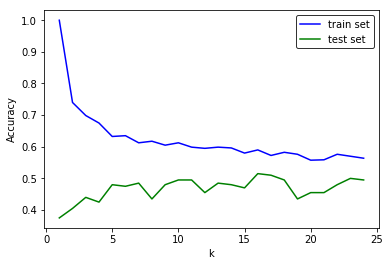

In [125]:
train_acc = list()
test_acc = list()  # list storing the test set accuracies
test_ks = range(1,25)  # list containing values of k to be tested

for k in tqdm.tqdm(test_ks):
    classifier_new = KNeighborsClassifier(n_neighbors=k)
    classifier_new.fit(x_train,y_train)
    train_acc.append(classifier_new.score(x_train,y_train))
    test_acc.append(classifier_new.score(x_test,y_test))
plt.plot(test_ks,train_acc,color="blue",label="train set")
plt.plot(test_ks,test_acc,color="green",label="test set")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='best',edgecolor='black')
print("Best k: {}".format(test_ks[np.argmax(test_acc)]))
print("Best accuracy for test set {}%",max(test_acc)*100)

In [126]:
k = 16
classifier = KNeighborsClassifier(n_neighbors=k,n_jobs=1)
classifier.fit(x_train,y_train)
#print(classifier.predict(x_test))
print("Accuracy of train set {}%".format(classifier.score(x_train,y_train)*100))
print("Accuracy of test set {}%".format(classifier.score(x_test,y_test)*100))

Accuracy of train set 59.0%
Accuracy of test set 51.5%


Training Set:
              precision    recall  f1-score   support

        -1.0       0.58      0.67      0.62       347
         0.0       1.00      0.01      0.02        93
         1.0       0.60      0.67      0.63       360

    accuracy                           0.59       800
   macro avg       0.73      0.45      0.42       800
weighted avg       0.64      0.59      0.56       800

[[231   0 116]
 [ 45   1  47]
 [120   0 240]]
[[0.66570605 0.         0.32222222]
 [0.129683   0.01075269 0.13055556]
 [0.34582133 0.         0.66666667]]


Text(0, 0.5, 'Predicted class')

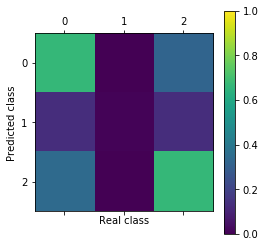

In [131]:
y_pred_train = classifier.predict(x_train)
report = classification_report(y_true=y_train,y_pred=y_pred_train)
matrix = confusion_matrix(y_true=y_train,y_pred=y_pred_train)
normalized_matrix = matrix/np.sum(matrix,axis=1)
print("Training Set:")
print(report)
print(matrix)
print(normalized_matrix)
plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

Test Set:
              precision    recall  f1-score   support

        -1.0       0.51      0.58      0.54        92
         0.0       0.00      0.00      0.00        22
         1.0       0.52      0.58      0.55        86

    accuracy                           0.52       200
   macro avg       0.35      0.39      0.36       200
weighted avg       0.46      0.52      0.49       200

[[53  1 38]
 [14  0  8]
 [36  0 50]]
[[0.57608696 0.04545455 0.44186047]
 [0.15217391 0.         0.09302326]
 [0.39130435 0.         0.58139535]]


Text(0, 0.5, 'Predicted class')

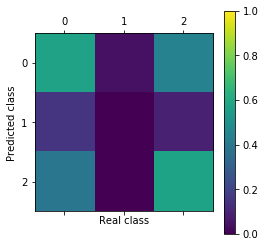

In [132]:
y_pred_test = classifier.predict(x_test)
report = classification_report(y_true=y_test,y_pred=y_pred_test)
matrix = confusion_matrix(y_true=y_test,y_pred=y_pred_test)
normalized_matrix = matrix/np.sum(matrix,axis=1)
print("Test Set:")
print(report)
print(matrix)
print(normalized_matrix)
plt.matshow(normalized_matrix,vmin=0,vmax=1)
plt.colorbar()
plt.xlabel("Real class")
plt.ylabel("Predicted class")

## A few more things to test (perspectives for P1 project) 
- Try to make a binary classification between Pyrat and python wins.
- Try to improve the classification performance of the draw class by using a balanced dataset for the three classes (i.e. try to have the same number of examples in each class).
- Try to change the parameters of the maze (mazeWidth, mazeHeight, piecesOfCheese, ...). 


*When working on your project P1, we expect you to investigate these last questions in order to explore the method you chose.*

Part 2 - Playing PyRat using Machine Learning by training a classifier to predict the next movement to play (or - Supervised Baseline for Pyrat Challenge)
--

In the folder of the lab session, in addition to this notebook, there is a subfolder "supervised_playing". 

Go into this folder. You will find a few files. Complete them, in order to setup the training of a classifier to play pyrat!

Precisely, you have to complete the following files: 
- utils.py
- train.py